**2D Transfromations**




*    defines four points a, b, c, and d in homogeneous coordinates (x, y, 1).

*    creates a 3x4 matrix X where each column represents one of the points.

*    Without .T: When you create np.array([a, b, c, d]), you get a 4x3 array

*    [[0, 0, 1],
 [0, 1, 1],
 [1, 1, 1],
 [1, 0, 1]]

*   With .T (transpose):After applying .T, you get a 3x4 array:

*    [[0, 0, 1, 1],[0, 1, 1, 0], [1, 1, 1, 1]]

*   The purpose of this transposition is to arrange the data in a way that's more convenient for the subsequent operations and for how homogeneous coordinates are typically represented in computer graphics and linear algebra.

*    In the transposed form, each column represents a point in homogeneous coordinates (x, y, 1).
*    This arrangement makes it easier to apply transformations. When you multiply a transformation matrix with X, each column (point) is transformed independently.
*    It aligns with the conventional representation in linear algebra where column vectors are more common than row vectors for representing points and vectors.


**Structure:**
* The matrix A has the form:

<br>
[a  b  tx]
[c  d  ty]
[0  0  1 ]
<br>
Where [a b; c d] represents a linear transformation (scaling, rotation, shear), and [tx; ty] represents a translation.
Components:
<br>
[1, 0.5, t[0]]: First row
[2, 1.5, t[1]]: Second row
[0, 0, 1]: Third row


**Interpretation:**

*    The upper-left 2x2 submatrix [[1, 0.5], [2, 1.5]] represents a combination of scaling and shearing.
*    t[0] and t[1] in the third column represent the translation in x and y directions respectively.
The bottom row [0, 0, 1] is standard for homogeneous coordinates, allowing both linear transformation and translation in a single matrix multiplication.


**Effects:**

*    Scaling: The diagonal elements (1 and 1.5) indicate non-uniform scaling.
*    Shearing: The off-diagonal elements (0.5 and 2) introduce shearing.
*    Translation: t[0] and t[1] translate the shape after the linear transformation.


**Result:**
*    When this matrix is applied to a point (x, y, 1) in homogeneous coordinates, it will:

*    Scale and shear the point according to the upper-left 2x2 submatrix.
*    Then translate it by (t[0], t[1]).



*    These lines prepare the data for plotting a closed shape. Let's break them down:

*    x = np.append(X[0, :], X[0, 0])

X[0, :] selects the entire first row of X, which contains the x-coordinates of all points.
<br>
X[0, 0] selects the first element of the first row, which is the x-coordinate of the first point.
<br>
np.append() adds this first x-coordinate to the end of the array.


*    y = np.append(X[1, :], X[1, 0])

Similarly, X[1, :] selects the entire second row of X, containing the y-coordinates.
X[1, 0] is the y-coordinate of the first point.
<br>
This y-coordinate is appended to the end of the array.



*    The purpose of these operations is to create a closed shape for plotting:

*    Creating a loop: By adding the coordinates of the first point to the end, it ensures the plot will draw a line back to the starting point, closing the shape.
*    Preparing for plotting: The plot() function in matplotlib expects separate arrays for x and y coordinates. These lines create those arrays.
*    Ensuring closure: This is particularly useful for polygons or any closed shapes. Without this, the shape would be open, missing the line from the last point back to the first.

*    For example, if X represented a square with corners at (0,0), (0,1), (1,1), and (1,0), these operations would create:

*    x = [0, 0, 1, 1, 0]
*    y = [0, 1, 1, 0, 0]

*    When plotted, this draws a line from (0,0) to (0,1) to (1,1) to (1,0) and then back to (0,0), forming a closed square.
This technique is commonly used in graphics programming to ensure closed shapes are properly rendered.

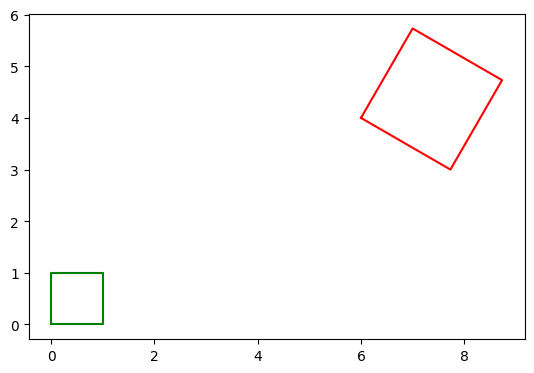

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Points a, b, c, d
a, b, c, d = [0, 0, 1], [0, 1, 1], [1, 1, 1], [1, 0, 1]

X = np.array([a, b, c, d]).T
# Y = X + np.array([3, 4, 1]).reshape(3,1) # transfromed version of X

# theta = np.pi/180*60
t = np.array([6, 4]).T
# H = np.array([[np.cos(theta), -np.sin(theta), t[0]], [np.sin(theta), np.cos(theta), t[1]], [0, 0, 1]])
# Y = H @ X

A  = np.array([[1.732, 1, t[0]], [-1, 1.732, t[1]], [0, 0, 4]]) # Affine transformaiton
Y = A @ X #Matrix multiplication:The @ operator in Python represents matrix multiplication. So A @ X multiplies matrix A with matrix X.
# Homographic transformation

x = np.append(X[0, :], X[0, 0])
y = np.append(X[1, :], X[1, 0])

fig, ax = plt.subplots(1,1)
ax.plot(x, y, color='g')

x = np.append(Y[0, :], Y[0, 0])
y = np.append(Y[1, :], Y[1, 0])
ax.plot(x, y, color='r')
ax.set_aspect('equal')
plt.show()

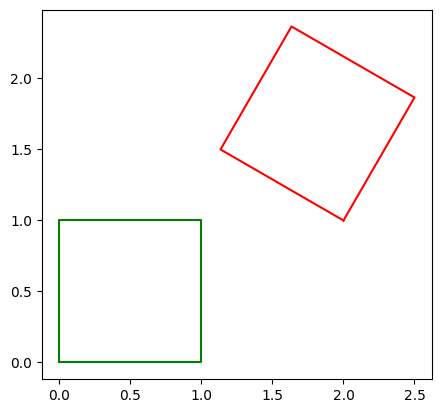

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Points a, b, c, d
a, b, c, d = [0, 0, 1], [0, 1, 1], [1, 1, 1], [1, 0, 1]

X = np.array([a, b, c, d]).T
Y = X + np.array([3, 4, 1]).reshape(3,1) # transformed version of X
theta = np.pi/180*60
t = np.array([2, 1]).T
H = np.array([[np.cos(theta), -np.sin(theta), t[0]], [np.sin(theta), np.cos(theta), t[1]], [0, 0, 1]])
Y = H @ X

#A  = np.array([[1, 0.5, t[0]], [2, 1.5, t[1]], [0, 0, 1]]) # Affine transformaiton
#Y = A @ X #Matrix multiplication:The @ operator in Python represents matrix multiplication. So A @ X multiplies matrix A with matrix X.
# Homographic transformation

x = np.append(X[0, :], X[0, 0])
y = np.append(X[1, :], X[1, 0])
fig, ax = plt.subplots(1,1)
ax.plot(x, y, color='g')

x = np.append(Y[0, :], Y[0, 0])
y = np.append(Y[1, :], Y[1, 0])
ax.plot(x, y, color='r')
ax.set_aspect('equal')
plt.show()

**Transforming Using a Given Homography**

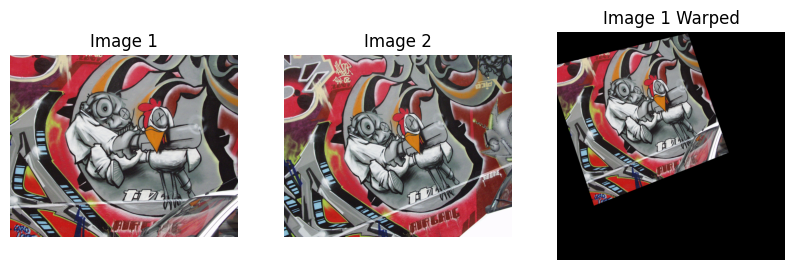

In [18]:
# Transfroming the first image onto the second
# Gaffiti images: https://www.robots.ox.ac.uk/~vgg/data/affine/
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
im1 = cv.imread(r'D:\semester 5\EN3160\graf\graf\img1.ppm', cv.IMREAD_ANYCOLOR)
im2 = cv.imread(r'D:\semester 5\EN3160\graf\graf\img2.ppm', cv.IMREAD_ANYCOLOR)
assert im1 is not None
assert im2 is not None

H = np.array([[8.7976964e-01,   3.1245438e-01,  -3.9430589e+01],
  [-1.8389418e-01,   9.3847198e-01,   1.5315784e+02],
   [1.9641425e-04,  -1.6015275e-05,   1.0000000e+00]])

#with open(r'D:\semester 5\EN3160\graf\graf\H1to2p') as f:
#   H = np.array([[float(h) for h in line.split()] for line in f])

im1to2 = cv.warpPerspective(im1, H, (1000,1000))

cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)
cv.imshow('Image 1', im1)
cv.waitKey(0)
cv.namedWindow('Image 2', cv.WINDOW_AUTOSIZE)
cv.imshow('Image 2', im2)
cv.waitKey(0)
cv.namedWindow('Image 1 Warped', cv.WINDOW_AUTOSIZE)
cv.imshow('Image 1 Warped', im1to2)
cv.waitKey(0)
cv.destroyAllWindows()

im1_rgb = cv.cvtColor(im1, cv.COLOR_BGR2RGB)
im2_rgb = cv.cvtColor(im2, cv.COLOR_BGR2RGB)
im1to2_rgb = cv.cvtColor(im1to2, cv.COLOR_BGR2RGB)

# Plotting Image 1
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(im1_rgb)
plt.title('Image 1')
plt.axis('off')

# Plotting Image 2
plt.subplot(1, 3, 2)
plt.imshow(im2_rgb)
plt.title('Image 2')
plt.axis('off')

# Plotting Image 1 Warped
plt.subplot(1, 3, 3)
plt.imshow(im1to2_rgb)
plt.title('Image 1 Warped')
plt.axis('off')

# Display the plots
plt.show()

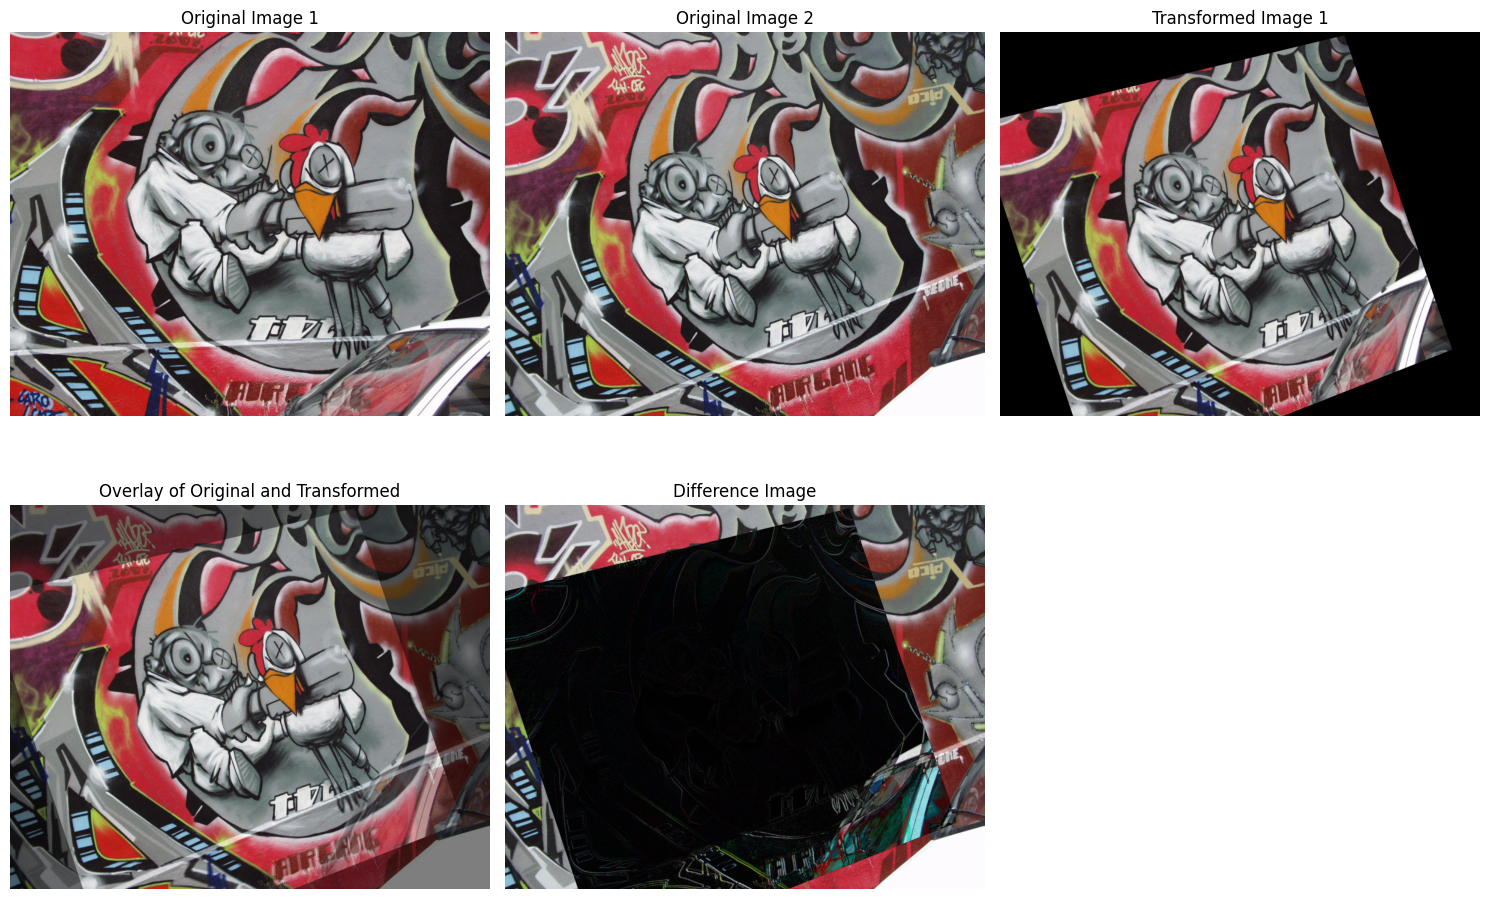

In [19]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Load the images
im1 = cv.imread(r'D:\semester 5\EN3160\graf\graf\img1.ppm', cv.IMREAD_ANYCOLOR)
im2 = cv.imread(r'D:\semester 5\EN3160\graf\graf\img2.ppm', cv.IMREAD_ANYCOLOR)
assert im1 is not None
assert im2 is not None

# Define the homography matrix H
H = np.array([[8.7976964e-01, 3.1245438e-01, -3.9430589e+01],
              [-1.8389418e-01, 9.3847198e-01, 1.5315784e+02],
              [1.9641425e-04, -1.6015275e-05, 1.0000000e+00]])

# Apply the homography to transform im1 to the perspective of im2
im1to2 = cv.warpPerspective(im1, H, (im2.shape[1], im2.shape[0]))

# Overlay Method: Superimpose the original and transformed images with partial transparency
overlay = cv.addWeighted(im2, 0.5, im1to2, 0.5, 0)

# Difference Image: Subtract the transformed image from the original
difference = cv.absdiff(im2, im1to2)

# Convert BGR to RGB for Matplotlib display
im1_rgb = cv.cvtColor(im1, cv.COLOR_BGR2RGB)
im2_rgb = cv.cvtColor(im2, cv.COLOR_BGR2RGB)
im1to2_rgb = cv.cvtColor(im1to2, cv.COLOR_BGR2RGB)
overlay_rgb = cv.cvtColor(overlay, cv.COLOR_BGR2RGB)
difference_rgb = cv.cvtColor(difference, cv.COLOR_BGR2RGB)

# Plotting the results using Matplotlib
plt.figure(figsize=(15, 10))

# Original Image 1
plt.subplot(2, 3, 1)
plt.imshow(im1_rgb)
plt.title('Original Image 1')
plt.axis('off')

# Original Image 2
plt.subplot(2, 3, 2)
plt.imshow(im2_rgb)
plt.title('Original Image 2')
plt.axis('off')

# Transformed Image 1 to Image 2 Perspective
plt.subplot(2, 3, 3)
plt.imshow(im1to2_rgb)
plt.title('Transformed Image 1')
plt.axis('off')

# Overlay Image
plt.subplot(2, 3, 4)
plt.imshow(overlay_rgb)
plt.title('Overlay of Original and Transformed')
plt.axis('off')

# Difference Image
plt.subplot(2, 3, 5)
plt.imshow(difference_rgb)
plt.title('Difference Image')
plt.axis('off')

# Show all plots
plt.tight_layout()
plt.show()



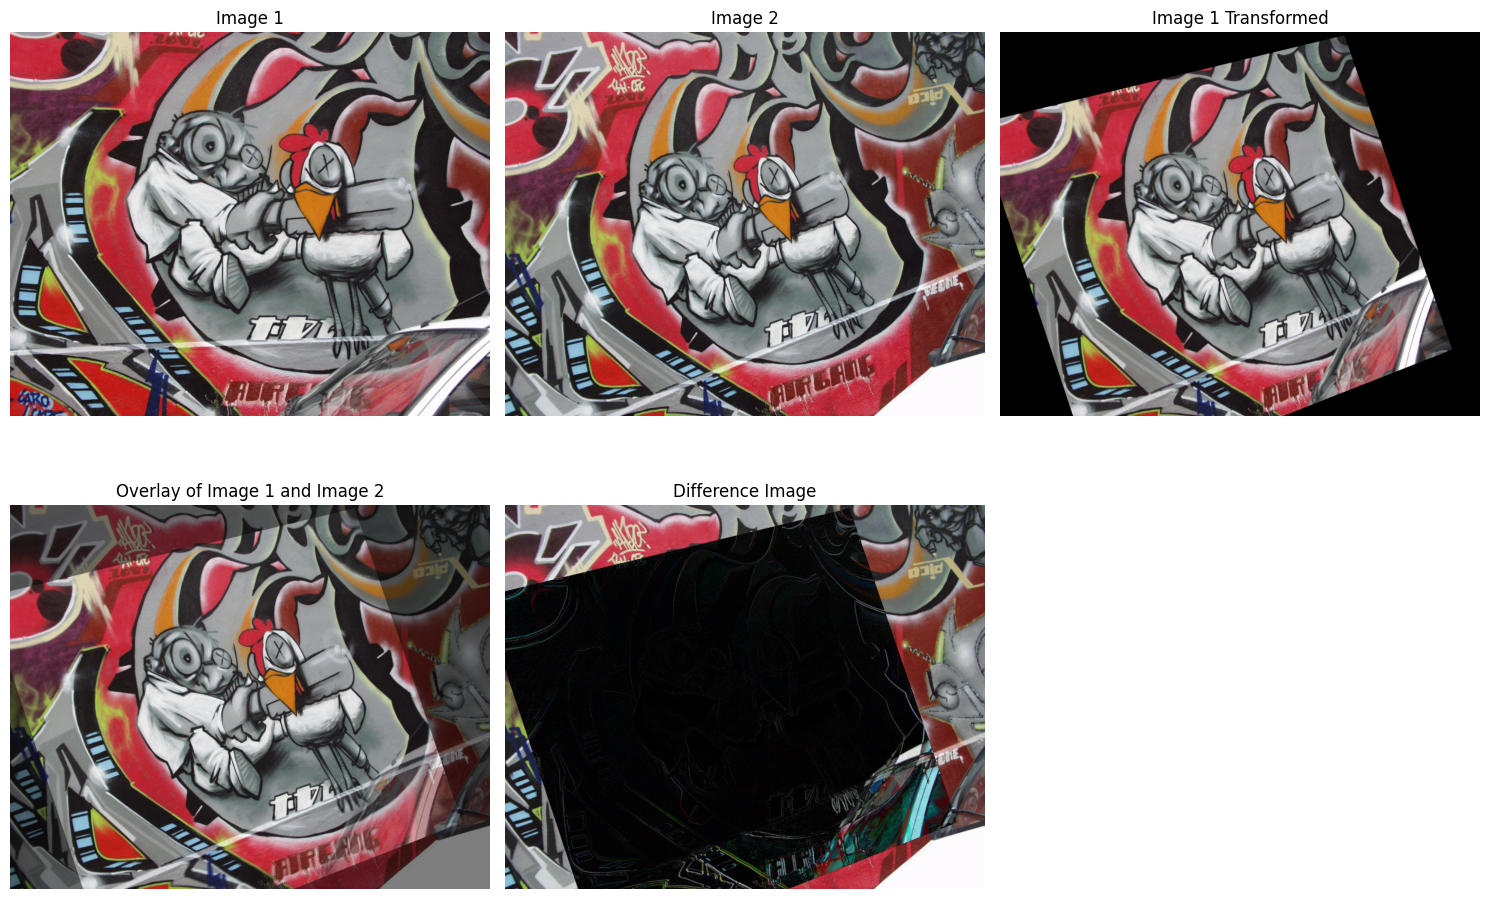

In [20]:
# Import necessary libraries
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Read images
im1 = cv.imread(r'D:\semester 5\EN3160\graf\graf\img1.ppm', cv.IMREAD_ANYCOLOR)
im2 = cv.imread(r'D:\semester 5\EN3160\graf\graf\img2.ppm', cv.IMREAD_ANYCOLOR)

# Ensure images are loaded
assert im1 is not None
assert im2 is not None

# Homography matrix
H = np.array([[8.7976964e-01, 3.1245438e-01, -3.9430589e+01],
              [-1.8389418e-01, 9.3847198e-01, 1.5315784e+02],
              [1.9641425e-04, -1.6015275e-05, 1.0000000e+00]])

# Apply warpPerspective to transform im1 onto im2
im1to2 = cv.warpPerspective(im1, H, (im2.shape[1], im2.shape[0]))

# Overlay Method: Superimpose images with partial transparency
overlay = cv.addWeighted(im2, 0.5, im1to2, 0.5, 0)

# Difference Image: Compute the absolute difference
difference = cv.absdiff(im2, im1to2)

# Convert BGR to RGB for Matplotlib display
im1_rgb = cv.cvtColor(im1, cv.COLOR_BGR2RGB)
im2_rgb = cv.cvtColor(im2, cv.COLOR_BGR2RGB)
im1to2_rgb = cv.cvtColor(im1to2, cv.COLOR_BGR2RGB)
overlay_rgb = cv.cvtColor(overlay, cv.COLOR_BGR2RGB)
difference_rgb = cv.cvtColor(difference, cv.COLOR_BGR2RGB)

# Plotting the images
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(im1_rgb)
plt.title('Image 1')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(im2_rgb)
plt.title('Image 2')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(im1to2_rgb)
plt.title('Image 1 Transformed')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(overlay_rgb)
plt.title('Overlay of Image 1 and Image 2')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(difference_rgb)
plt.title('Difference Image')
plt.axis('off')

# Display all plots
plt.tight_layout()
plt.show()


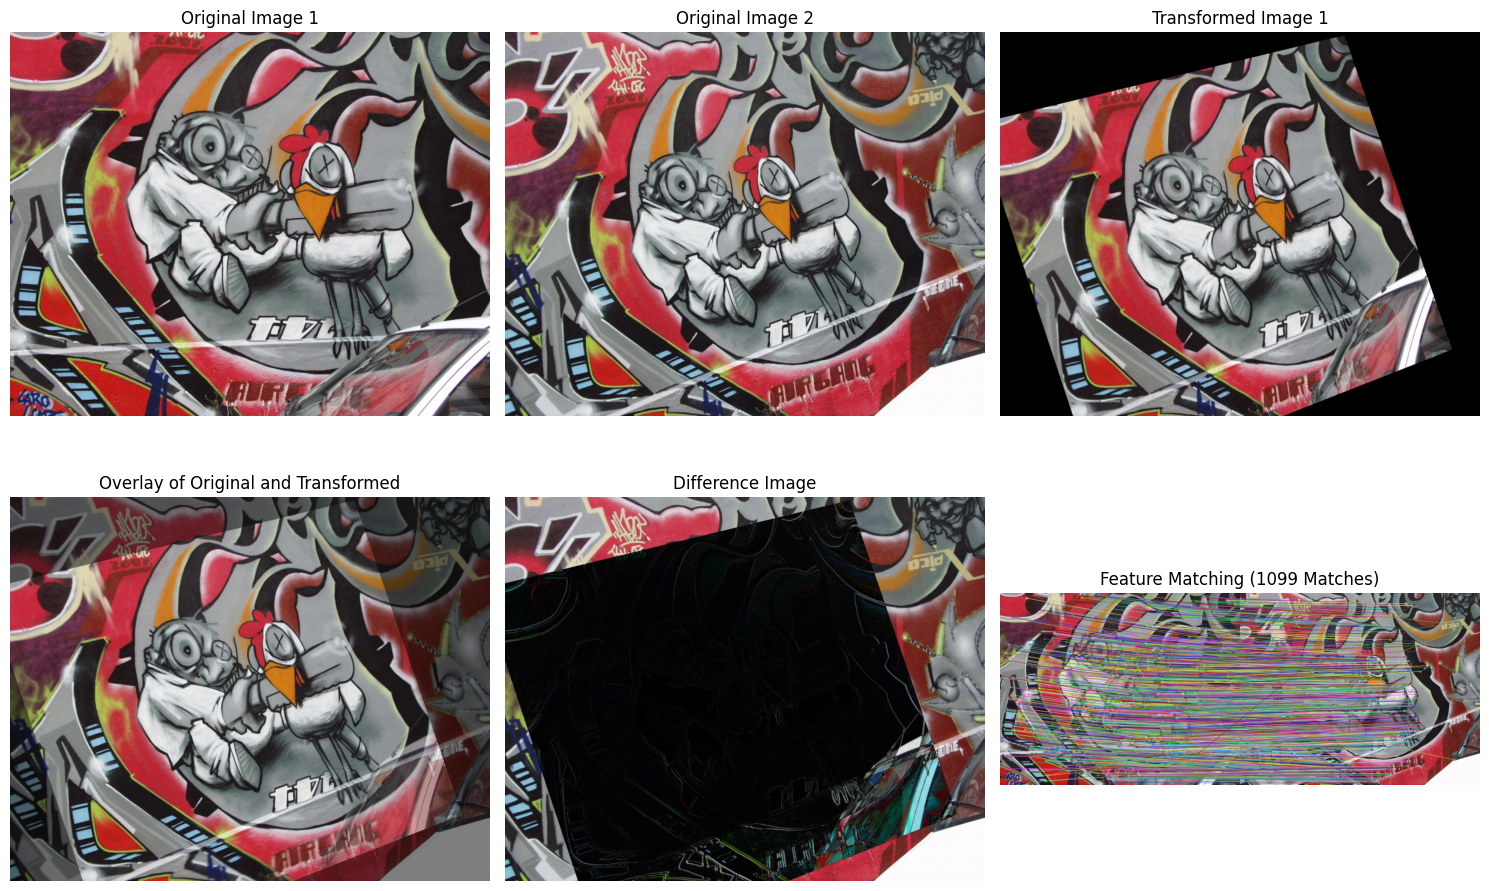

In [7]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Load the images
im1 = cv.imread(r'D:\semester 5\EN3160\graf\graf\img1.ppm', cv.IMREAD_COLOR)
im2 = cv.imread(r'D:\semester 5\EN3160\graf\graf\img2.ppm', cv.IMREAD_COLOR)
assert im1 is not None
assert im2 is not None

# Define the homography matrix H
H = np.array([[8.7976964e-01, 3.1245438e-01, -3.9430589e+01],
              [-1.8389418e-01, 9.3847198e-01, 1.5315784e+02],
              [1.9641425e-04, -1.6015275e-05, 1.0000000e+00]])

# Apply the homography to transform im1 to the perspective of im2
im1to2 = cv.warpPerspective(im1, H, (im2.shape[1], im2.shape[0]))

# Overlay Method: Superimpose the original and transformed images with partial transparency
overlay = cv.addWeighted(im2, 0.5, im1to2, 0.5, 0)

# Difference Image: Subtract the transformed image from the original
difference = cv.absdiff(im2, im1to2)

# Feature Matching using SIFT
sift = cv.SIFT_create()

# Detect and compute keypoints and descriptors
kp1, des1 = sift.detectAndCompute(im1, None)
kp2, des2 = sift.detectAndCompute(im2, None)

# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw matches
matched_img = cv.drawMatches(im1, kp1, im2, kp2, good_matches, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Convert BGR to RGB for Matplotlib display
im1_rgb = cv.cvtColor(im1, cv.COLOR_BGR2RGB)
im2_rgb = cv.cvtColor(im2, cv.COLOR_BGR2RGB)
im1to2_rgb = cv.cvtColor(im1to2, cv.COLOR_BGR2RGB)
overlay_rgb = cv.cvtColor(overlay, cv.COLOR_BGR2RGB)
difference_rgb = cv.cvtColor(difference, cv.COLOR_BGR2RGB)
matched_img_rgb = cv.cvtColor(matched_img, cv.COLOR_BGR2RGB)

# Plotting the results using Matplotlib
plt.figure(figsize=(15, 10))

# Original Image 1
plt.subplot(2, 3, 1)
plt.imshow(im1_rgb)
plt.title('Original Image 1')
plt.axis('off')

# Original Image 2
plt.subplot(2, 3, 2)
plt.imshow(im2_rgb)
plt.title('Original Image 2')
plt.axis('off')

# Transformed Image 1 to Image 2 Perspective
plt.subplot(2, 3, 3)
plt.imshow(im1to2_rgb)
plt.title('Transformed Image 1')
plt.axis('off')

# Overlay Image
plt.subplot(2, 3, 4)
plt.imshow(overlay_rgb)
plt.title('Overlay of Original and Transformed')
plt.axis('off')

# Difference Image
plt.subplot(2, 3, 5)
plt.imshow(difference_rgb)
plt.title('Difference Image')
plt.axis('off')

# Matched Features
plt.subplot(2, 3, 6)
plt.imshow(matched_img_rgb)
plt.title(f'Feature Matching ({len(good_matches)} Matches)')
plt.axis('off')

# Show all plots
plt.tight_layout()
plt.show()


**Transfroming the Second Image onto the First**

In [8]:
import numpy as np
import cv2 as cv
im1 = cv.imread(r'D:\semester 5\EN3160\graf\graf\img1.ppm', cv.IMREAD_ANYCOLOR)
im2 = cv.imread(r'D:\semester 5\EN3160\graf\graf\img2.ppm', cv.IMREAD_ANYCOLOR)
assert im1 is not None
assert im2 is not None

with open(r'D:\semester 5\EN3160\graf\graf\H1to2p') as f:
   H = np.array([[float(h) for h in line.split()] for line in f])

im2to1 = cv.warpPerspective(im2, np.linalg.inv(H), (1000,1000))
im2to1[0:im1.shape[0], 0:im1.shape[1]] = im1
im2to1[0:im1.shape[0], 0:im1.shape[1]] += np.array([50, 0, 0], dtype=np.uint8) # Change te color a little

cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)
cv.imshow('Image 1', im1)
cv.waitKey(0)
cv.namedWindow('Image 2', cv.WINDOW_AUTOSIZE)
cv.imshow('Image 2', im2)
cv.waitKey(0)
cv.namedWindow('Image 1 Warped', cv.WINDOW_AUTOSIZE)
cv.imshow('Image 1 Warped', im2to1)
cv.waitKey(0)
cv.destroyAllWindows()

**3. Computing the Homogrpahy Using Mouse-Clicked Points and Warping**

In [24]:
import cv2 as cv
import numpy as np


N = 5
global n 
n = 0    
p1 = np.empty((N,2))
p2 = np.empty((N,2))

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1],(x,y),5,(255,0,0),-1)        
        p[n] = (x,y)
        n += 1
          

im1 = cv.imread('D:\semester 5\EN3160\graf\graf\img1.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread('D:\semester 5\EN3160\graf\graf\img4.ppm', cv.IMREAD_ANYCOLOR)

im1copy = im1.copy()
im4copy = im4.copy()

cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)

param = [p1, im1copy]
cv.setMouseCallback('Image 1',draw_circle, param)

while(1):
    cv.imshow("Image 1", im1copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break


param = [p2, im4copy]
n = 0
cv.namedWindow("Image 4", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 4',draw_circle, param)

while(1):
    cv.imshow("Image 4", im4copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break


print(p1)
print(p2)

H = cv.findHomography(p1, p2)
H = H[0]
print(H)
im4_warped = cv.warpPerspective(im4, np.linalg.inv(H), (1000,1000))
im4_warped[0:im1.shape[0], 0:im1.shape[1]] = im1

cv.namedWindow("Image 4 Warped", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 4 Warped", im4_warped)
cv.waitKey(0)
cv.destroyAllWindows()

[[134. 241.]
 [239. 361.]
 [269. 253.]
 [310. 254.]
 [310. 254.]]
[[418. 247.]
 [260. 267.]
 [353. 371.]
 [310. 231.]
 [261. 231.]]
[[ 1.37375274e-01 -1.16057978e+00  2.55754172e+02]
 [ 1.22665940e-01 -1.18778581e+00  2.66547123e+02]
 [ 4.76095933e-04 -4.46906021e-03  1.00000000e+00]]


**Computing the Homogrpahy Using Mouse-Clicked Points without OpenCV**

In [9]:
import cv2 as cv
import numpy as np


N = 5
global n 
n = 0    
p1 = np.empty((N,2))
p2 = np.empty((N,2))

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1],(x,y),5,(255,0,0),-1)        
        p[n] = (x,y)
        n += 1
          

im1 = cv.imread('D:\semester 5\EN3160\graf\graf\img1.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread('D:\semester 5\EN3160\graf\graf\img4.ppm', cv.IMREAD_ANYCOLOR)

im1copy = im1.copy()
im4copy = im4.copy()
   

cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)

param = [p1, im1copy]
cv.setMouseCallback('Image 1',draw_circle, param)

while(1):
    cv.imshow("Image 1", im1copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break


param = [p2, im4copy]
n = 0
cv.namedWindow("Image 4", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 4',draw_circle, param)

while(1):
    cv.imshow("Image 4", im4copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break


print(p1)
print(p2)

A = np.empty((2*N, 9))

for i in range(0,N):
    xt = p1[i, :]
    xpt = p2[i, :]
    A[2*i, :] = np.array([0, 0, 0, xt[0], xt[1], 1, -xpt[1]*xt[0], -xpt[1]*xt[1], -xpt[1]])
    A[2*i+1, :] = np.array([xt[0], xt[1], 1, 0, 0, 0, -xpt[0]*xt[0], -xpt[0]*xt[1], -xpt[0]])    
    
print(A)

_, S, Vh = np.linalg.svd(np.matmul(A.T, A)) # See https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html
print(S)
Hhat = Vh[-1, :]
Hhat = Hhat.reshape(3,3)
Hhat = Hhat/Hhat[2,2]
print('Hhat', Hhat)

H = cv.findHomography(p1, p2)
H = H[0]
print('H using find homography', H)

im4_warped = cv.warpPerspective(im4, np.linalg.inv(Hhat), (1000,1000))
im4_warped[0:im1.shape[0], 0:im1.shape[1]] = im1

cv.namedWindow("Image 4 Warped", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 4 Warped", im4_warped)
cv.waitKey(0)
cv.destroyAllWindows()

[[441. 336.]
 [330. 197.]
 [462. 171.]
 [258. 278.]
 [255. 146.]]
[[590. 189.]
 [346. 239.]
 [278. 247.]
 [348. 375.]
 [519. 343.]]
[[ 0.00000e+00  0.00000e+00  0.00000e+00  4.41000e+02  3.36000e+02
   1.00000e+00 -8.33490e+04 -6.35040e+04 -1.89000e+02]
 [ 4.41000e+02  3.36000e+02  1.00000e+00  0.00000e+00  0.00000e+00
   0.00000e+00 -2.60190e+05 -1.98240e+05 -5.90000e+02]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  3.30000e+02  1.97000e+02
   1.00000e+00 -7.88700e+04 -4.70830e+04 -2.39000e+02]
 [ 3.30000e+02  1.97000e+02  1.00000e+00  0.00000e+00  0.00000e+00
   0.00000e+00 -1.14180e+05 -6.81620e+04 -3.46000e+02]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  4.62000e+02  1.71000e+02
   1.00000e+00 -1.14114e+05 -4.22370e+04 -2.47000e+02]
 [ 4.62000e+02  1.71000e+02  1.00000e+00  0.00000e+00  0.00000e+00
   0.00000e+00 -1.28436e+05 -4.75380e+04 -2.78000e+02]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  2.58000e+02  2.78000e+02
   1.00000e+00 -9.67500e+04 -1.04250e+05 -3.75000e+02]
 [ 2.58000e+02

In [10]:
import cv2
import numpy as np

def find_homography(image1_path, image2_path):
    # Read the images
    img1 = cv2.imread(image1_path)
    img2 = cv2.imread(image2_path)

    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Initialize SIFT detector
    sift = cv2.SIFT_create()

    # Find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(gray1, None)
    kp2, des2 = sift.detectAndCompute(gray2, None)

    # FLANN parameters
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)

    # FLANN-based matcher
    flann = cv2.FlannBasedMatcher(index_params, search_params)

    # Match descriptors
    matches = flann.knnMatch(des1, des2, k=2)

    # Store good matches using Lowe's ratio test
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)

    # Extract location of good matches
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    # Find homography
    H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    return H

# Example usage
image1_path = 'D:\semester 5\EN3160\graf\graf\img1.ppm'
image2_path = 'D:\semester 5\EN3160\graf\graf\img2.ppm'
homography_matrix = find_homography(image1_path, image2_path)
print("Homography Matrix:")
print(homography_matrix)

Homography Matrix:
[[ 8.80563687e-01  3.13519536e-01 -3.98692614e+01]
 [-1.82446085e-01  9.35005430e-01  1.53677243e+02]
 [ 1.99393158e-04 -2.01021524e-05  1.00000000e+00]]
